In [4]:
import pandas as pd
import numpy as np

In [5]:
df= pd.read_csv(r"D:\Imarticus\Machine_Learning\Exam_Project\insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# 1) Linear Regression 

In [11]:
df1=df.copy()

In [12]:
Quantitative_Variable = df1.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


<Axes: >

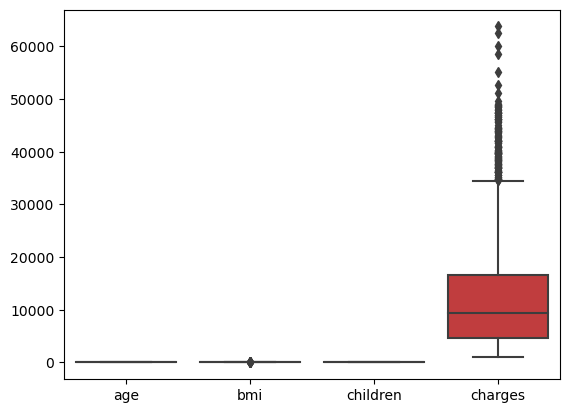

In [13]:
import seaborn as sns
sns.boxplot(data=df1)

In [14]:
for i in df1:                  
    if df1[i].dtypes in ("float64","int64"): 
        q1 = df1[i].quantile(0.25)  
        q3 = df1[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        df1[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

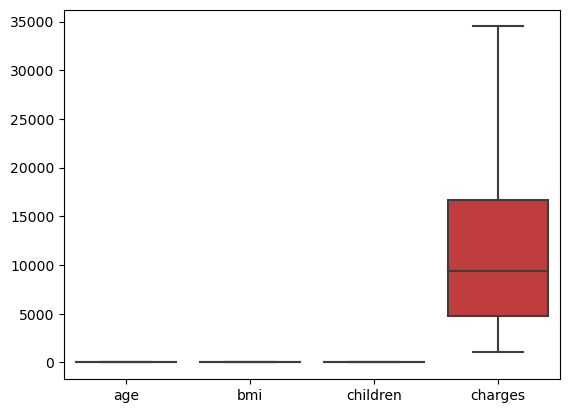

In [15]:
import seaborn as sns
sns.boxplot(data=df1)

In [16]:
Qualitative_Variable = df1.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [17]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) 
Qualitative_Variable.head(3)

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2


C:\Users\soham\AppData\Local\Temp\ipykernel_104332\1309250585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Quantitative_Variable[i])


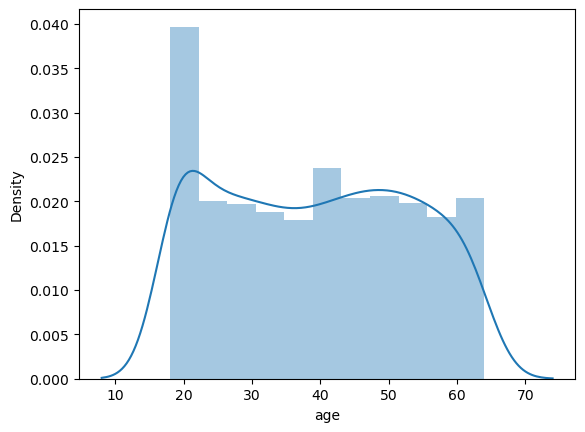

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\1309250585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Quantitative_Variable[i])


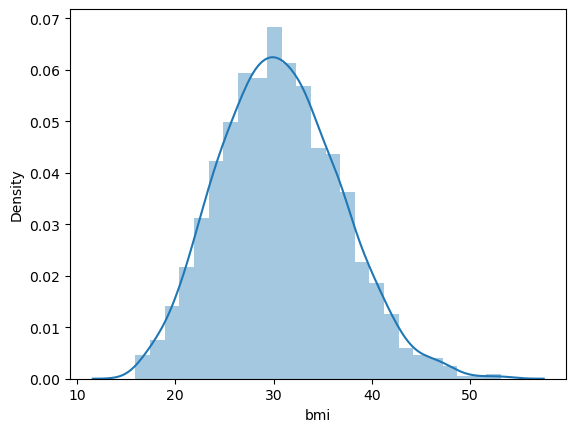

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\1309250585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Quantitative_Variable[i])


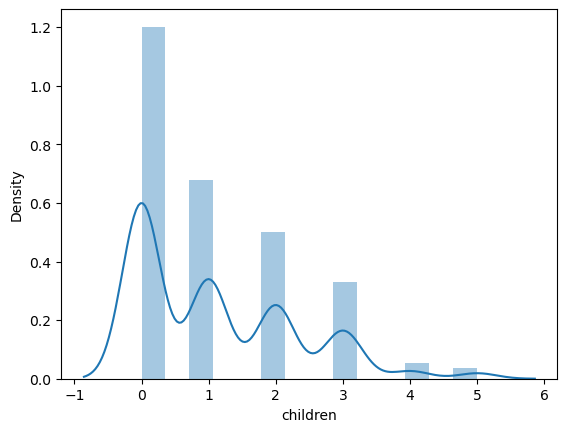

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\1309250585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Quantitative_Variable[i])


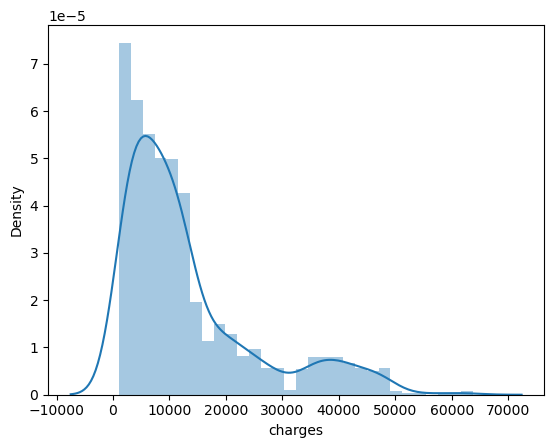

In [18]:
import matplotlib.pyplot as plt
for i in Quantitative_Variable:
    sns.distplot(Quantitative_Variable[i])
    plt.xlabel(i)
    plt.show()

In [19]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [20]:
print(max(Final_combined.bmi))

53.13


In [21]:
X = Final_combined.drop('charges', axis= 1)
y = Final_combined[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,charges,age,bmi,children,sex,smoker,region
234,6710.19190,39,24.510,2,1,0,1
1016,2709.24395,19,24.605,1,0,0,1
6,8240.58960,46,33.440,1,0,0,2
79,6571.02435,41,32.965,0,0,0,1
309,7749.15640,41,33.060,2,0,0,1


In [24]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,charges,age,bmi,children,sex,smoker,region
charges,1.000000,0.294097,0.208287,0.047395,0.076049,0.784177,0.004320
age,0.294097,1.000000,0.120667,0.049127,0.000447,-0.030507,0.012153
bmi,0.208287,0.120667,1.000000,0.002539,0.052357,0.011129,0.180300
children,0.047395,0.049127,0.002539,1.000000,-0.002856,-0.010213,0.000438
sex,0.076049,0.000447,0.052357,-0.002856,1.000000,0.083907,-0.024294
smoker,0.784177,-0.030507,0.011129,-0.010213,0.083907,1.000000,0.004023
region,0.004320,0.012153,0.180300,0.000438,-0.024294,0.004023,1.000000


In [25]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [26]:
np.round(Model3.intercept_,3)

array([-11584.792])

In [27]:
np.round(Model3.coef_,4)

array([[ 2.55360100e+02,  3.32035900e+02,  4.05074300e+02,
        -2.28060000e+00,  2.36108764e+04, -3.58131400e+02]])

In [28]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  75.0


In [30]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  6065.77


### Taking sq.rt of Charges

In [31]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


C:\Users\soham\AppData\Local\Temp\ipykernel_104332\991563960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Final_combined.charges)


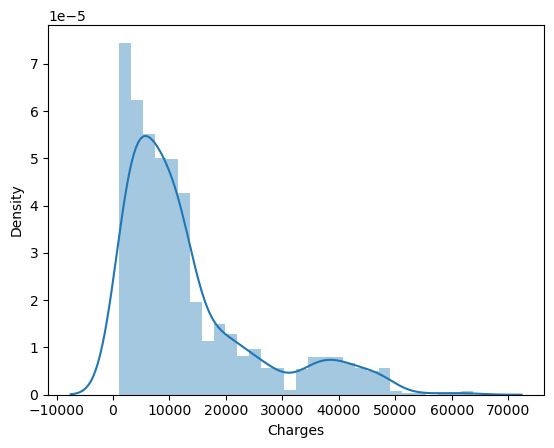

In [32]:
sns.distplot(Final_combined.charges)
plt.xlabel('Charges')
plt.show()

In [33]:
Final_combined.charges= np.sqrt(Final_combined.charges)

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\991563960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Final_combined.charges)


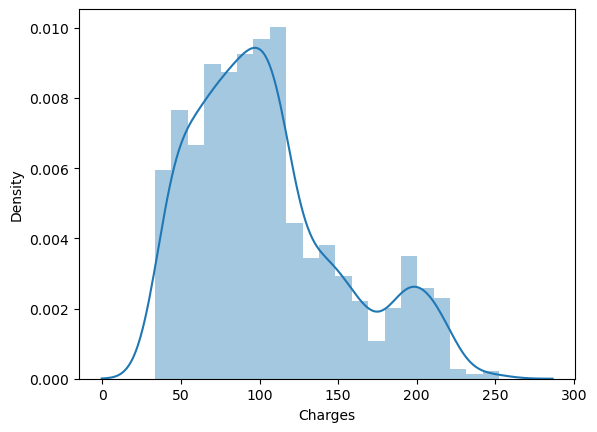

In [34]:
sns.distplot(Final_combined.charges)
plt.xlabel('Charges')
plt.show()

In [35]:
X = Final_combined.drop('charges', axis= 1)
y = Final_combined[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [36]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,charges,age,bmi,children,sex,smoker,region
234,81.915761,39,24.510,2,1,0,1
1016,52.050398,19,24.605,1,0,0,1
6,90.777693,46,33.440,1,0,0,2
79,81.061855,41,32.965,0,0,0,1
309,88.029293,41,33.060,2,0,0,1


In [37]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [38]:
np.round(Model3.intercept_,3)

array([3.732])

In [39]:
np.round(Model3.coef_,4)

array([[ 1.3681,  0.9757,  2.9097, -1.4773, 90.3109, -1.8744]])

In [40]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)

In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  76.0


In [42]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  23.13


In [43]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,charges,age,bmi,children,sex,smoker,region
894,116.425963,62,32.110,0,1,0,0
1041,41.288015,18,23.085,0,1,0,0
957,112.293753,24,26.790,1,1,0,1
45,143.632460,55,37.300,0,1,0,3
483,99.398531,51,39.500,1,0,0,3


In [44]:
test['fitted_value'] = Model3.predict(X_test)  
test.head()

,charges,age,bmi,children,sex,smoker,region,fitted_value
894,116.425963,62,32.110,0,1,0,0,118.406238
1041,41.288015,18,23.085,0,1,0,0,49.404928
957,112.293753,24,26.790,1,1,0,1,62.263793
45,143.632460,55,37.300,0,1,0,3,108.270701
483,99.398531,51,39.500,1,0,0,3,109.332014


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(test.charges,test.fitted_value)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  81.0


In [46]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(test['charges'],test['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) 

RMSE of Test Data :  20.82


In [47]:
import pickle

In [48]:
# with open('Linear_Model.pkl', 'wb') as model_file:
#     pickle.dump(Model3, model_file)

# VSM:

In [49]:
Final_combined.charges= np.sqrt(Final_combined.charges)

In [50]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model3 = sfs(lreg, n_features_to_select = 3, direction='forward', scoring='r2')
Model3.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3,
                          scoring='r2')

In [51]:
Model3.feature_names_in_

array(['age', 'bmi', 'children', 'sex', 'smoker', 'region'], dtype=object)

In [52]:
Model3.get_feature_names_out()

array(['age', 'bmi', 'smoker'], dtype=object)

In [53]:
X_train = X_train.loc[:,['age', 'bmi', 'smoker']]
X_train

,age,bmi,smoker
234,39,24.510,0
1016,19,24.605,0
6,46,33.440,0
79,41,32.965,0
309,41,33.060,0
...,...,...,...
1038,22,28.880,0
645,48,30.780,0
15,19,24.600,0
1202,22,32.110,0


In [54]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,charges,age,bmi,smoker
234,81.915761,39,24.510,0
1016,52.050398,19,24.605,0
6,90.777693,46,33.440,0
79,81.061855,41,32.965,0
309,88.029293,41,33.060,0


In [55]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [56]:
np.round(Model3.intercept_,3)

array([5.021])

In [57]:
np.round(Model3.coef_,4)

array([[ 1.3821,  0.9061, 90.0744]])

In [58]:
Model3.feature_names_in_

array(['age', 'bmi', 'smoker'], dtype=object)

In [59]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)

In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  76.0


In [61]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  23.49


# Decision Tree

In [62]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [63]:
Final_combined.charges= np.sqrt(Final_combined.charges)

In [64]:
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,129.942002,0,1,3
1,18,33.770,1,41.539768,1,0,2
2,28,33.000,3,66.704288,1,0,2
3,33,22.705,0,148.271611,1,0,1
4,32,28.880,0,62.184043,1,0,1


In [65]:
X = Final_combined.drop('charges', axis= 1)
y = Final_combined[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=133)

In [66]:
params = {
    'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],  
    'min_samples_split': [5,10,15],
    #'min_samples_leaf': [30,35,40,45,50], 
    #'max_depth':[2,3,4,5]
}

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=111),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=111),
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'absolute_error', 'friedman_mse'],
                         'min_samples_split': [5, 10, 15]},
             verbose=1)

In [68]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,charges,age,bmi,children,sex,smoker,region
841,111.013224,59,24.70,0,1,0,0
719,110.596626,58,33.44,0,0,0,1
741,135.079590,27,29.15,0,1,1,2
242,187.510359,55,26.80,1,0,0,3
894,116.425963,62,32.11,0,1,0,0


In [69]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', min_samples_split=15,
                      random_state=111)

In [70]:
train['Predicted'] = grid_search_cv.predict(X_train)  
train.head()

,charges,age,bmi,children,sex,smoker,region,Predicted
841,111.013224,59,24.70,0,1,0,0,110.655009
719,110.596626,58,33.44,0,0,0,1,108.815325
741,135.079590,27,29.15,0,1,1,2,134.049204
242,187.510359,55,26.80,1,0,0,3,108.519095
894,116.425963,62,32.11,0,1,0,0,116.028100


In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  89.0


In [72]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  15.8


In [73]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,charges,age,bmi,children,sex,smoker,region
1242,65.545947,22,21.280,3,0,0,1
539,165.366387,53,31.350,0,1,0,2
942,47.090011,18,40.185,0,0,0,0
28,52.680093,23,17.385,1,1,0,1
652,90.997927,48,31.130,0,0,0,2


In [74]:
test['Predicted'] = grid_search_cv.predict(X_test)  
test.head()

,charges,age,bmi,children,sex,smoker,region,Predicted
1242,65.545947,22,21.280,3,0,0,1,68.273614
539,165.366387,53,31.350,0,1,0,2,100.157403
942,47.090011,18,40.185,0,0,0,0,47.289308
28,52.680093,23,17.385,1,1,0,1,146.953674
652,90.997927,48,31.130,0,0,0,2,88.341160


In [75]:
from sklearn.metrics import r2_score
r2 = r2_score(test.charges,test.Predicted)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  73.0


In [76]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2))

RMSE of Test Data :  15.8


In [77]:
#with open('Dec_Tree.pkl', 'wb') as model_file:
    #pickle.dump(grid_search_cv, model_file)

# Random Forest

In [195]:
df2=df.copy()

In [196]:
Quantitative_Variable = df2.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [197]:
Qualitative_Variable = df2.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [198]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) 
Qualitative_Variable.head(3)

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2


In [199]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [200]:
Final_combined.charges= np.sqrt(Final_combined.charges)

In [201]:
X = Final_combined.drop('charges', axis= 1)
y = Final_combined[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [202]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=4, random_state=42)

In [203]:
rf_model.fit(X_train, y_train)

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=4, random_state=42)

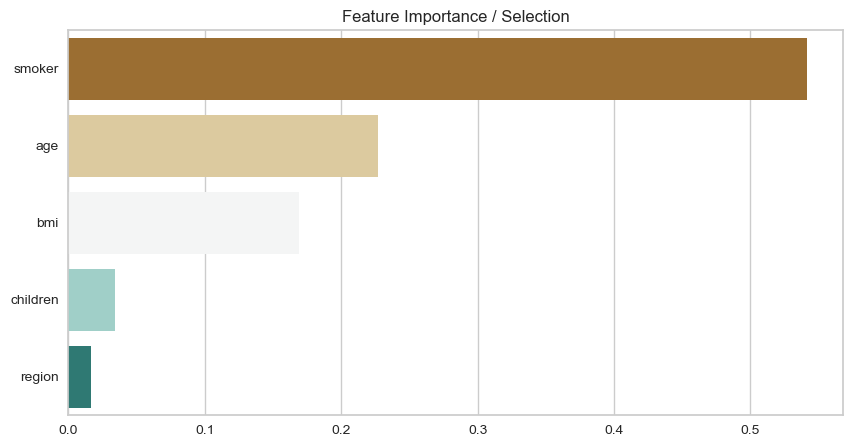

In [204]:
imp = pd.Series(data=rf_model.feature_importances_, index=rf_model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')

In [205]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,charges,age,bmi,children,sex,smoker,region
234,81.915761,39,24.510,2,1,0,1
1016,52.050398,19,24.605,1,0,0,1
6,90.777693,46,33.440,1,0,0,2
79,81.061855,41,32.965,0,0,0,1
309,88.029293,41,33.060,2,0,0,1


In [206]:
train['Predicted'] = np.round(rf_model.predict(X_train),2)

In [207]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  94.0


In [208]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  11.52


In [209]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,charges,age,bmi,children,sex,smoker,region
894,116.425963,62,32.110,0,1,0,0
1041,41.288015,18,23.085,0,1,0,0
957,112.293753,24,26.790,1,1,0,1
45,143.632460,55,37.300,0,1,0,3
483,99.398531,51,39.500,1,0,0,3


In [210]:
test['Predicted'] = rf_model.predict(X_test)  
test.head()

,charges,age,bmi,children,sex,smoker,region,Predicted
894,116.425963,62,32.110,0,1,0,0,114.673892
1041,41.288015,18,23.085,0,1,0,0,41.329158
957,112.293753,24,26.790,1,1,0,1,51.483790
45,143.632460,55,37.300,0,1,0,3,114.173849
483,99.398531,51,39.500,1,0,0,3,97.854098


In [211]:
from sklearn.metrics import r2_score
r2 = r2_score(test.charges,test.Predicted)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  82.0


In [212]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(test['charges'],test['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2))

RMSE of Test Data :  20.19


In [96]:
# with open('Rand_Forest.pkl', 'wb') as model_file:
#     pickle.dump(rf_model, model_file)

# Kmeans Clustering

In [97]:
df3=df.copy()

In [98]:
Quantitative_Variable = df2.select_dtypes(include=[np.number])
Quantitative_Variable.head(3)

Qualitative_Variable = df2.select_dtypes(include=['object'])
Qualitative_Variable.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


In [99]:
from sklearn.preprocessing import LabelEncoder

Qualitative_Variable = Qualitative_Variable.apply(LabelEncoder().fit_transform) 
Qualitative_Variable.head(3)

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2


In [100]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [101]:
samples = Final_combined.values  
samples

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  1.  ,  3.  ],
       [18.  , 33.77,  1.  , ...,  1.  ,  0.  ,  2.  ],
       [28.  , 33.  ,  3.  , ...,  1.  ,  0.  ,  2.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  2.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  3.  ],
       [61.  , 29.07,  0.  , ...,  0.  ,  1.  ,  1.  ]])

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

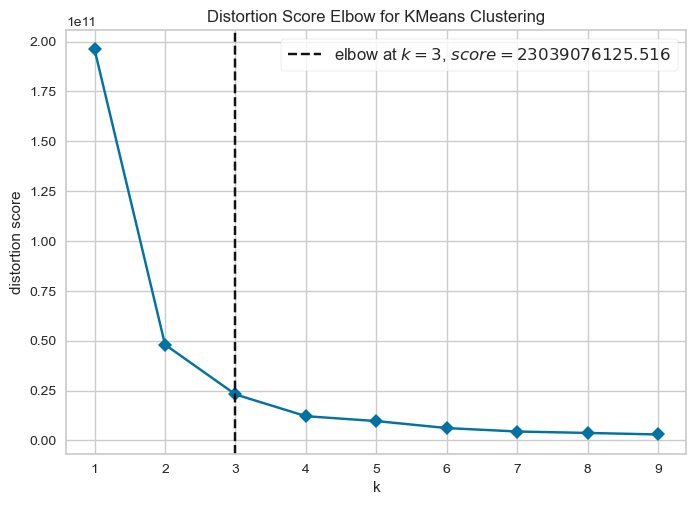

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        
visualizer.show()

In [103]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [104]:
Final_combined['Cluster_Made'] = model2.fit_predict(samples)
Final_combined.head()

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,age,bmi,children,charges,sex,smoker,region,Cluster_Made
0,19,27.900,0,16884.92400,0,1,3,2
1,18,33.770,1,1725.55230,1,0,2,0
2,28,33.000,3,4449.46200,1,0,2,0
3,33,22.705,0,21984.47061,1,0,1,2
4,32,28.880,0,3866.85520,1,0,1,0


In [105]:
Final_combined.Cluster_Made = Final_combined.Cluster_Made.replace([0,1,2],['First Group','Second Group','Third Group'])
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region,Cluster_Made
0,19,27.900,0,16884.92400,0,1,3,Third Group
1,18,33.770,1,1725.55230,1,0,2,First Group
2,28,33.000,3,4449.46200,1,0,2,First Group
3,33,22.705,0,21984.47061,1,0,1,Third Group
4,32,28.880,0,3866.85520,1,0,1,First Group


In [106]:
Final_combined.Cluster_Made.value_counts(ascending=False)

Cluster_Made
First Group     911
Third Group     270
Second Group    157
Name: count, dtype: int64

# Splitting the dataset based on smoking:

In [107]:
Final_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   bmi           1338 non-null   float64
 2   children      1338 non-null   int64  
 3   charges       1338 non-null   float64
 4   sex           1338 non-null   int32  
 5   smoker        1338 non-null   int32  
 6   region        1338 non-null   int32  
 7   Cluster_Made  1338 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 68.1+ KB


In [108]:
Final_combined = Final_combined.drop('Cluster_Made', axis=1)

In [109]:
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [110]:
smoker = Final_combined.loc[Final_combined['smoker'] == 1]
non_smoker = Final_combined.loc[Final_combined['smoker'] == 0]

# 1) For smokers:

## 1)Liner Regression

In [111]:
smoker.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.90,0,16884.9240,0,1,3
11,62,26.29,0,27808.7251,0,1,2
14,27,42.13,0,39611.7577,1,1,2
19,30,35.30,0,36837.4670,1,1,3
23,34,31.92,1,37701.8768,0,1,0


<Axes: >

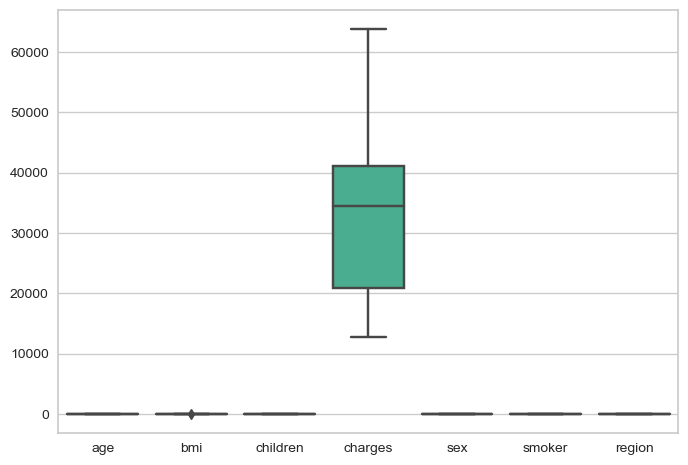

In [112]:
import seaborn as sns
sns.boxplot(data=smoker)

In [113]:
for i in smoker:                  
    if smoker[i].dtypes in ("float64","int64"): 
        q1 = smoker[i].quantile(0.25)  
        q3 = smoker[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        smoker[i].clip(lower=ll,upper=ul,inplace=True)

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\3856968805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker[i].clip(lower=ll,upper=ul,inplace=True)
C:\Users\soham\AppData\Local\Temp\ipykernel_104332\3856968805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker[i].clip(lower=ll,upper=ul,inplace=True)
C:\Users\soham\AppData\Local\Temp\ipykernel_104332\3856968805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smo

In [114]:
smoker=smoker.drop('smoker',axis=1)

<Axes: >

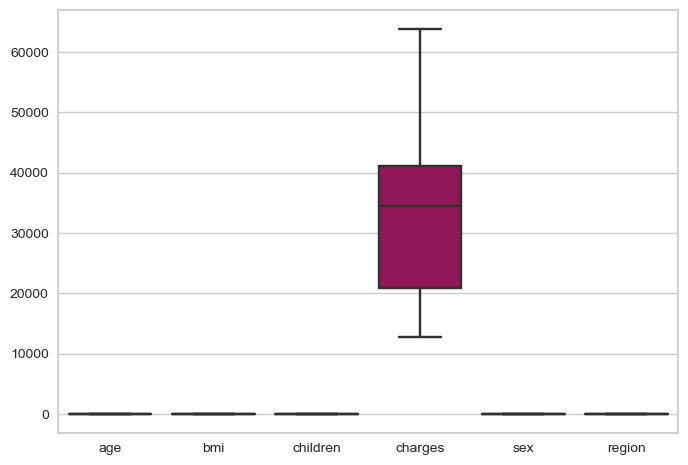

In [115]:
import seaborn as sns
sns.boxplot(data=smoker)

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\599461687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smoker.charges)


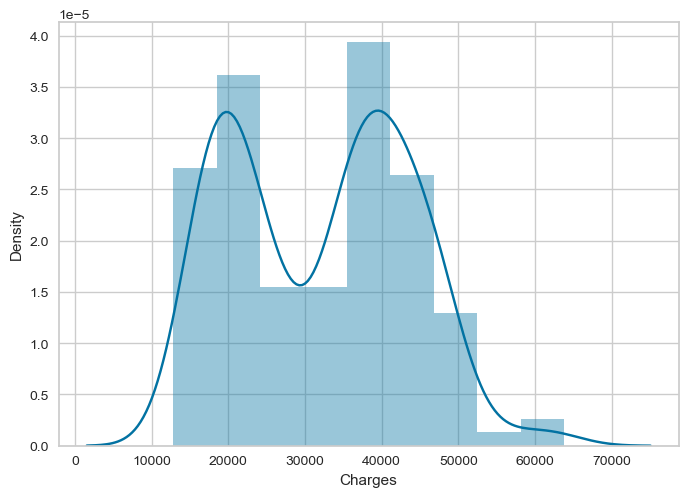

In [116]:
sns.distplot(smoker.charges)
plt.xlabel('Charges')
plt.show()

In [117]:
smoker.charges= np.sqrt(smoker.charges)

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\599461687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smoker.charges)


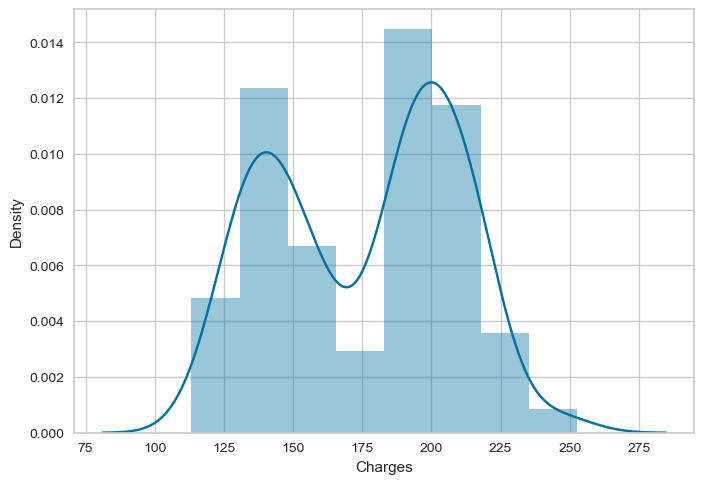

In [118]:
sns.distplot(smoker.charges)
plt.xlabel('Charges')
plt.show()

In [119]:
X = smoker.drop('charges', axis= 1)
y = smoker[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,charges,age,bmi,children,sex,region
98,149.708545,56,19.95,0,1,0
750,139.782842,37,26.40,0,0,2
883,215.070018,51,37.05,3,0,0
92,173.738127,59,29.83,3,1,0
280,149.437501,40,28.12,1,0,0


In [122]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,charges,age,bmi,children,sex,region
charges,1.000000,0.352410,0.824947,-0.000903,0.081140,0.111544
age,0.352410,1.000000,0.080507,0.037107,-0.031469,-0.067873
bmi,0.824947,0.080507,1.000000,-0.042809,0.136920,0.203671
children,-0.000903,0.037107,-0.042809,1.000000,0.048787,-0.023658
sex,0.081140,-0.031469,0.136920,0.048787,1.000000,0.022002
region,0.111544,-0.067873,0.203671,-0.023658,0.022002,1.000000


In [123]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [124]:
np.round(Model3.intercept_,3)

array([21.964])

In [125]:
np.round(Model3.coef_,4)

array([[ 0.6678,  4.2611,  0.6478, -1.4207, -1.0003]])

In [126]:
import numpy as np
train['fitted_charges'] = np.round(Model3.predict(X_train),2)

In [127]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.fitted_charges)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  76.0


In [128]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['fitted_charges'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  15.65


## Decision Tree

In [129]:
Final_combined = pd.concat([Quantitative_Variable,Qualitative_Variable],axis=1)
Final_combined.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [130]:
smoker = Final_combined.loc[Final_combined['smoker'] == 1]

In [131]:
smoker=smoker.drop('smoker',axis=1)

In [132]:
smoker.charges= np.sqrt(smoker.charges)

In [133]:
X = smoker.drop('charges', axis= 1)
y = smoker[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [134]:
params = {
    'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],  
    'min_samples_split': [15,25,30],
    'min_samples_leaf': [120,50,100],
    'max_depth':[3,4,5]
}

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'absolute_error', 'friedman_mse'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [15, 25, 30]},
             verbose=1)

In [136]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,charges,age,bmi,children,sex,region
98,149.708545,56,19.95,0,1,0
750,139.782842,37,26.40,0,0,2
883,215.070018,51,37.05,3,0,0
92,173.738127,59,29.83,3,1,0
280,149.437501,40,28.12,1,0,0


In [137]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=3, min_samples_leaf=50,
                      min_samples_split=15, random_state=42)

In [138]:
train['Predicted'] = grid_search_cv.predict(X_train)  
train.head()

,charges,age,bmi,children,sex,region,Predicted
98,149.708545,56,19.95,0,1,0,146.404204
750,139.782842,37,26.40,0,0,2,146.404204
883,215.070018,51,37.05,3,0,0,212.034219
92,173.738127,59,29.83,3,1,0,146.404204
280,149.437501,40,28.12,1,0,0,146.404204


In [139]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  82.0


In [140]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  13.68


In [141]:
test = pd.concat([y_test,X_test],axis=1)
test.head()

,charges,age,bmi,children,sex,region
297,148.252072,47,25.410,1,1,2
53,194.274485,36,34.430,0,1,2
14,199.027028,27,42.130,0,1,2
843,165.933459,57,29.810,0,0,2
380,122.501345,27,17.955,2,0,0


In [142]:
test['Predicted'] = grid_search_cv.predict(X_test)  
test.head()

,charges,age,bmi,children,sex,region,Predicted
297,148.252072,47,25.410,1,1,2,146.404204
53,194.274485,36,34.430,0,1,2,195.281859
14,199.027028,27,42.130,0,1,2,195.281859
843,165.933459,57,29.810,0,0,2,146.404204
380,122.501345,27,17.955,2,0,0,146.404204


In [143]:
from sklearn.metrics import r2_score
r2 = r2_score(test.charges,test.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  82.0


In [144]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(test['charges'],test['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  14.38


## Random Forest

In [145]:
smoker = Final_combined.loc[Final_combined['smoker'] == 1]

In [146]:
smoker=smoker.drop('smoker',axis=1)

In [147]:
smoker.charges= np.sqrt(smoker.charges)

In [148]:
X = smoker.drop('charges', axis= 1)
y = smoker[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [149]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=3, random_state=42)

In [150]:
rf_model.fit(X_train, y_train)

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=3, random_state=42)

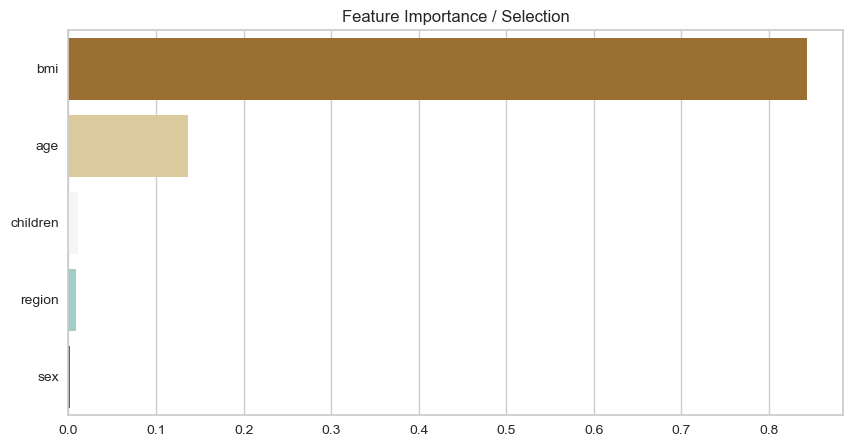

In [151]:
imp = pd.Series(data=rf_model.feature_importances_, index=rf_model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')

In [152]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,charges,age,bmi,children,sex,region
98,149.708545,56,19.95,0,1,0
750,139.782842,37,26.40,0,0,2
883,215.070018,51,37.05,3,0,0
92,173.738127,59,29.83,3,1,0
280,149.437501,40,28.12,1,0,0


In [153]:
train['Predicted'] = np.round(rf_model.predict(X_train),2)

In [154]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  97.0


In [155]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  5.4


# 2) For non-smokers:

In [156]:
non_smoker = Final_combined.loc[Final_combined['smoker'] == 0]

In [157]:
non_smoker.head()

,age,bmi,children,charges,sex,smoker,region
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
5,31,25.740,0,3756.62160,0,0,2


In [158]:
non_smoker=non_smoker.drop('smoker',axis=1)

<Axes: >

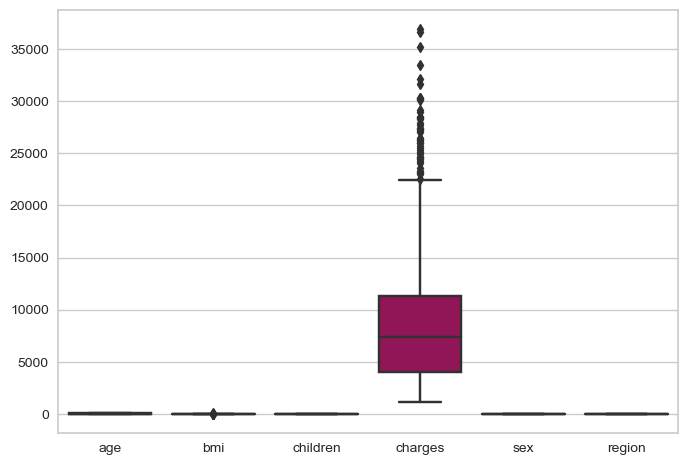

In [159]:
import seaborn as sns
sns.boxplot(data=non_smoker)

In [160]:
for i in non_smoker:                  
    if non_smoker[i].dtypes in ("float64","int64"): 
        q1 = non_smoker[i].quantile(0.25)  
        q3 = non_smoker[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        non_smoker[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

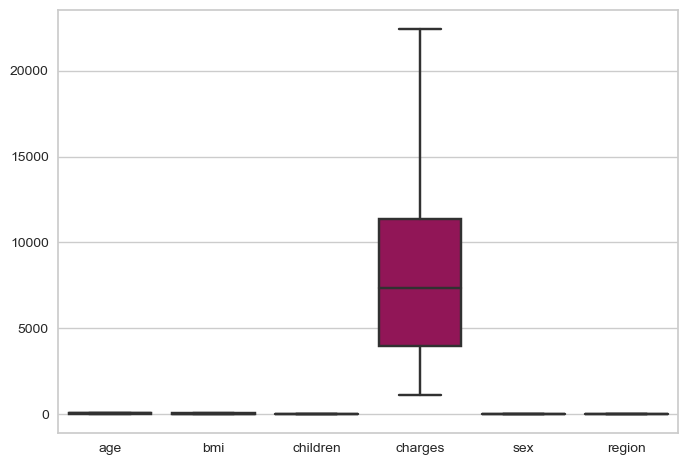

In [161]:
import seaborn as sns
sns.boxplot(data=non_smoker)

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\3900864511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_smoker.charges)


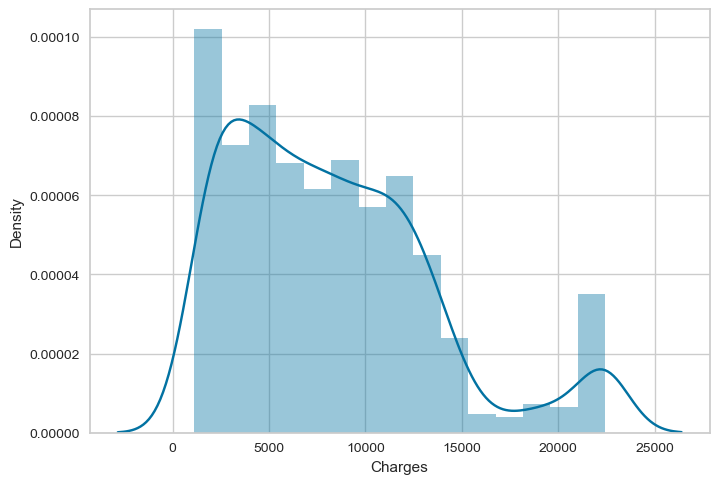

In [162]:
sns.distplot(non_smoker.charges)
plt.xlabel('Charges')
plt.show()

In [163]:
non_smoker.charges= np.sqrt(non_smoker.charges)

C:\Users\soham\AppData\Local\Temp\ipykernel_104332\3900864511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_smoker.charges)


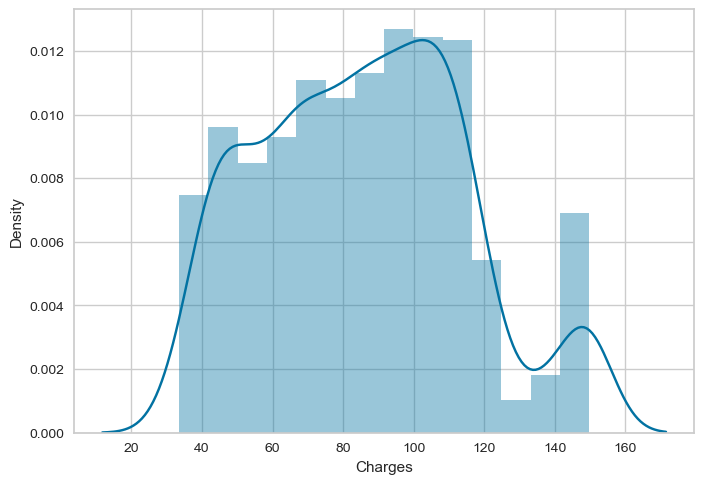

In [164]:
sns.distplot(non_smoker.charges)
plt.xlabel('Charges')
plt.show()

In [165]:
X = non_smoker.drop('charges', axis= 1)
y = non_smoker[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,charges,age,bmi,children,sex,region
606,59.654172,27,25.175,0,0,0
424,94.701267,48,30.200,2,1,3
746,108.341353,34,27.000,2,1,3
676,111.739881,55,40.810,3,0,2
318,86.146355,44,27.645,0,0,1


In [168]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,charges,age,bmi,children,sex,region
charges,1.000000,0.753443,0.099199,0.154032,-0.078562,-0.059283
age,0.753443,1.000000,0.141018,0.015208,-0.038037,0.014825
bmi,0.099199,0.141018,1.000000,0.011421,0.018418,0.160188
children,0.154032,0.015208,0.011421,1.000000,-0.014450,0.015831
sex,-0.078562,-0.038037,0.018418,-0.014450,1.000000,-0.006105
region,-0.059283,0.014825,0.160188,0.015831,-0.006105,1.000000


In [169]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [170]:
np.round(Model3.intercept_,3)

array([24.964])

In [171]:
np.round(Model3.coef_,4)

array([[ 1.5513,  0.0219,  3.5506, -2.8701, -1.9507]])

In [172]:
import numpy as np
train['fitted_charges'] = np.round(Model3.predict(X_train),2)

In [173]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.fitted_charges)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  60.0


In [174]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['fitted_charges'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) 

RMSE of Train Data :  18.8


# Decision Tree

In [175]:
non_smoker = Final_combined.loc[Final_combined['smoker'] == 0]

In [176]:
non_smoker=non_smoker.drop('smoker',axis=1)

In [177]:
non_smoker.charges= np.sqrt(non_smoker.charges)

In [178]:
X = non_smoker.drop('charges', axis= 1)
y = non_smoker[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [179]:
params = {
    'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],  
    'min_samples_split': [15,25,30],
    'min_samples_leaf': [120,50,100],
    'max_depth':[3,4,5]
}

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'absolute_error', 'friedman_mse'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [15, 25, 30]},
             verbose=1)

In [181]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,charges,age,bmi,children,sex,region
606,59.654172,27,25.175,0,0,0
424,94.701267,48,30.200,2,1,3
746,108.341353,34,27.000,2,1,3
676,111.739881,55,40.810,3,0,2
318,86.146355,44,27.645,0,0,1


In [182]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50, min_samples_split=15,
                      random_state=42)

In [183]:
train['Predicted'] = grid_search_cv.predict(X_train)  
train.head()

,charges,age,bmi,children,sex,region,Predicted
606,59.654172,27,25.175,0,0,0,71.053902
424,94.701267,48,30.200,2,1,3,97.522022
746,108.341353,34,27.000,2,1,3,83.683567
676,111.739881,55,40.810,3,0,2,113.447081
318,86.146355,44,27.645,0,0,1,103.324497


In [184]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  55.00000000000001


In [185]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  21.12


## Random Forest

In [186]:
non_smoker = Final_combined.loc[Final_combined['smoker'] == 0]
non_smoker=non_smoker.drop('smoker',axis=1)
non_smoker.charges= np.sqrt(non_smoker.charges)

In [187]:
X = non_smoker.drop('charges', axis= 1)
y = non_smoker[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [188]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=3, random_state=42)

In [189]:
rf_model.fit(X_train, y_train)

C:\Users\soham\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=3, random_state=42)

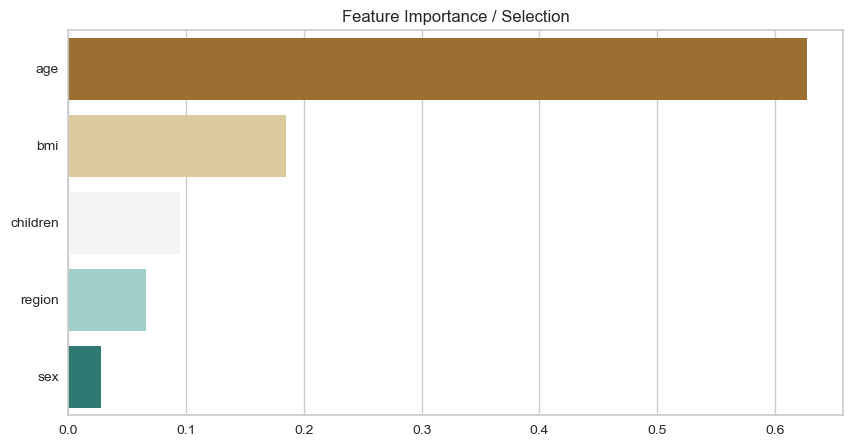

In [190]:
imp = pd.Series(data=rf_model.feature_importances_, index=rf_model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')

In [191]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,charges,age,bmi,children,sex,region
606,59.654172,27,25.175,0,0,0
424,94.701267,48,30.200,2,1,3
746,108.341353,34,27.000,2,1,3
676,111.739881,55,40.810,3,0,2
318,86.146355,44,27.645,0,0,1


In [192]:
train['Predicted'] = np.round(rf_model.predict(X_train),2)

In [193]:
from sklearn.metrics import r2_score
r2 = r2_score(train.charges,train.Predicted)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  80.0


In [194]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['charges'],train['Predicted'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  13.87
